# Data Case 

## Hospital Bed Analysis

One of the critical issues during the COVID-19 pandemic is the management of hospital beds across Canada. In this question, you will perform the first-step analysis in better understanding the different types of beds and how they are distributed in Canada.

The file <i>beds-staffed-and-in-operations.csv</i> has the overall bed information in Canada (up to early 2020), as provided directly by the <b>Canadian Institute for Health Information</b>. The column information is as follows:

1. <i>Province:</i> The province of the hospital.
2. <i>Health region:</i> The health region in the province the hospital is associated with.
3. <i>Hospital name:</i> The hospital name.
4. <i>Type of hospital:</i> A string of letters associated with each hospital, where:<br>
    4.1. <b>G:</b> General<br>
    4.2. <b>S-Ped</b>: Specialty — Pediatric<br>
    4.3. <b>C</b>: Cancer Treatment<br>
    4.4. <b>S-Psy</b>: Specialty — Psychiatric<br>
    4.5. <b>S-Oth</b>: Specialty — Other<br>
    4.6. <b>R</b>: Rehabilitation<br>
    4.7. <b>E</b>: Extended Care/Chronic<br>
    4.8. <b>n/a</b>: No data was available.<br>
5. <i>Remaining columns:</i> Number of beds of each type. Empty indicates the hospital has no beds of that type.

The data is provided directly as is available, i.e., no cleaning has been performed. Answer the following managerial questions below to draw important insights on bed distributions in Canada.


<b> Note: </b> Before answering the questions, please go to to the Jupyter's menu and execute "Kernel", "Restart & Run all." This will ensure that the notebook and modules are appropriately loaded. Qualitative questions can be answered  either as comments or Jupyter markups in the appropriate cells.

### Loading Python modules

Start by first importing packages and modules needed for our analysis

In [1]:
import pandas as pd               # for data manipulation
import numpy as np                # for stats and numerical analysis
import matplotlib.pyplot as plt   # for plotting and data visualization

# Disable warning when creating new column in a DataFrame (SetttingwithCopyWarning)
pd.set_option('mode.chained_assignment', None)

### Retrieving data

Load the CSV files as DataFrames in Pandas/Python.

In [2]:
# Hopsital dataframe
dfHospital = pd.read_csv("beds-staffed-and-in-operation-Canada.csv", index_col=None, header=0)
dfHospital.head(3)

,Provnce,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
0,ON,Central East LHIN,Scarborough Health Network,G,Non-Teaching,62.0,50.0,26,92.0,20,33.0,482.0
1,ON,Central LHIN,Humber River Hospital,G,Non-Teaching,41.0,25.0,14,64.0,18,0.0,466.0
2,ON,Central LHIN,Mackenzie Health,G,Non-Teaching,30.0,14.0,6,25.0,23,74.0,259.0


In [3]:
# Number of Rows
dfHospital.shape[0]

628

### Question 1

We first want to gauge how provinces differ in terms of their health resources. To that end, what is the total number of hospitals per province in this dataset? Provide a plot to better illustrate this information. 

Why do some provinces have a much larger number of hospitals than others?

[1 pt]

In [4]:
# We will adjust the province name to facilitate our code. That is, notice the typo:
dfHospital.columns

Index(['Provnce', 'Health region', 'Hospital name', 'Type of hospital',
       'Teaching status', 'Intensive Care', 'Obstetrics', 'Pediatrics',
       'Mental Health and Addictions ', 'Rehabilitation', 'Long-Term Care',
       'Other Acute'],
      dtype='object')

In [5]:
# Set it up in the same dataframe because we will use that throughout
dfHospital = dfHospital.rename(columns={"Provnce":"Province"})
dfHospital.head(3)

,Province,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
0,ON,Central East LHIN,Scarborough Health Network,G,Non-Teaching,62.0,50.0,26,92.0,20,33.0,482.0
1,ON,Central LHIN,Humber River Hospital,G,Non-Teaching,41.0,25.0,14,64.0,18,0.0,466.0
2,ON,Central LHIN,Mackenzie Health,G,Non-Teaching,30.0,14.0,6,25.0,23,74.0,259.0


In [6]:
# Check now if there are any NaN in the column "Province"
dfHospital["Province"].isnull().sum()

1

In [7]:
# There are two. Let's check them:
dfHospital[ dfHospital["Province"].isnull() ]

,Province,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
80,NaN,North Zone,Hinton Healthcare Centre,G,Non-Teaching,NaN,NaN,NaN,NaN,NaN,NaN,23.0


In [8]:
# If we search online, we can see that the Hinton Healthcare Centre is in Alberta (code AB). 
# Let's fill it! Since there is only one NA, we can use the function fillna for that column
# (I am also reusing the same dataframe because it will not impact future analyses.)

dfHospital["Province"] = dfHospital["Province"].fillna("AB")

In [9]:
# Check again if all worked out 
dfHospital["Province"].isnull().sum()

0

In [10]:
dfHospital.head(3)

,Province,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
0,ON,Central East LHIN,Scarborough Health Network,G,Non-Teaching,62.0,50.0,26,92.0,20,33.0,482.0
1,ON,Central LHIN,Humber River Hospital,G,Non-Teaching,41.0,25.0,14,64.0,18,0.0,466.0
2,ON,Central LHIN,Mackenzie Health,G,Non-Teaching,30.0,14.0,6,25.0,23,74.0,259.0


In [11]:
# Let us now calculate the total number of hospitals per province
dfCount = dfHospital.groupby("Province").count()
dfCount

,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
Province,,,,,,,,,,,
AB,108,108,108,108,16,16,8,19,20,61,97
BC,99,99,99,99,37,33,16,35,16,23,79
MB,72,72,72,72,7,8,2,10,12,5,70
NB,25,25,25,25,10,9,7,10,6,11,21
NL,34,34,34,34,11,9,1,5,3,21,26
NS,37,37,37,37,11,9,2,14,10,9,32
NT,4,4,4,4,1,0,1,1,0,0,1
ON,142,142,142,142,72,72,41,61,59,87,125
PE,7,7,7,7,2,2,2,3,1,0,6


In [12]:
# I will use the column "Health region" to get the counts - just need to make sure it is not empty
dfHospital["Health region"].isnull().sum()

0

Text(0, 0.5, 'Total number of hospitals')

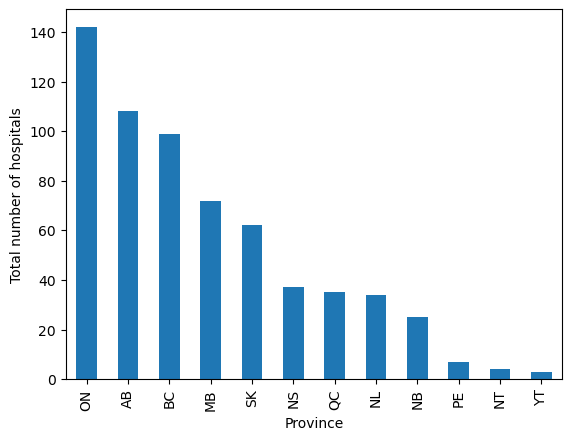

In [13]:
dfSorted = dfCount["Health region"].sort_values(ascending=False)
dfSorted.plot.bar()
plt.xlabel("Province")
plt.ylabel("Total number of hospitals")

Ontario. Alberta, and British Columbia have the largest number of hospitals in the region.

### Question 2

Compare now the <b>average number of ICU beds per hospital</b> for each province, using a single plot to depict this information. 

Are those averages consistent with the total number of hospitals you identified in Q1? Why is that (or not) the case? And how that could impact the response to COVID cases?  [2 pts]

In [14]:
# Let us first check the type to see if it is a number
dfHospital["Intensive Care"].dtypes

dtype('float64')

In [15]:
# Great!

# We now check if there are NaN in the ICU column
dfHospital["Intensive Care"].isnull().sum()

423

In [16]:
# As indicated in the statement, the NaN means that there are no beds of that type, so we replace it by zero.
dfHospital["Intensive Care"] = dfHospital["Intensive Care"].fillna(0)

In [17]:
# Finally, let us compare the average number of ICU beds per province
dfMeanBeds = dfHospital.groupby("Province")["Intensive Care"].mean()
dfMeanBeds

Province
AB     3.703704
BC     4.828283
MB     2.291667
NB     5.760000
NL     2.823529
NS     3.459459
NT     1.000000
ON    12.330986
PE     3.428571
QC    34.742857
SK     1.725806
YT     0.000000
Name: Intensive Care, dtype: float64

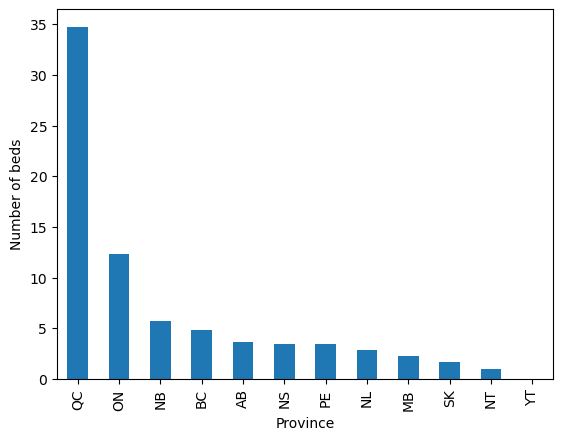

In [18]:
dfSortedBeds = dfMeanBeds.sort_values(ascending=False)
dfSortedBeds.plot.bar()
plt.ylabel("Number of beds")
plt.xlabel("Province")
plt.show()

QC has a much higher average number of ICU beds. Several reasons may explain this. For instance, the number of health regions could be much lower in QC than in ON; i.e., larger hospitals to attend the population as opposed to a many smaller hospitals spread out (we could even check that in the data). The issue is that, in hospitals with little number of beds (e.g., as possibly in ON), people may need to be transported to other locations if the number of cases increases too fast.

### Question 3

Many patients have a longer length-of-stay in hospitals due to COVID symptoms. Compare the percentage of <b>Rehabilitation beds</b> in Nova Scotia with respect to its health regions using a pie chart. Are they well-balanced? Why that is the case (or not)? [2 pts]

In [19]:
# We first take the hospitals in Ontario
dfNovaScotia = dfHospital[ dfHospital["Province"] == "NS" ]

In [20]:
# Let us first check the type to see if it is a number
dfNovaScotia["Rehabilitation"].dtypes

dtype('O')

In [21]:
# It is an object. Let us see what is the reason

def is_number(x):
    try:
        float(x)
    except ValueError:
        return False
    else:
        return True

dfNovaScotia[ ~(dfNovaScotia["Rehabilitation"].apply(is_number)) ]

,Province,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
345,NS,Central Zone,Eastern Shore Memorial Hospital,G,Non-Teaching,0.0,NaN,NaN,NaN,zero,NaN,5.0
346,NS,Central Zone,Hants Community Hospital,"G,E",Non-Teaching,0.0,NaN,NaN,NaN,zero,32.0,38.0


In [22]:
# For some reason there is a "zero" as opposed to zero. 
# We remove all strings to "0" and change its type to number

# As discussed in class, no need to worry about the warning

dfNovaScotia["Rehabilitation"] = pd.to_numeric(dfNovaScotia["Rehabilitation"], errors="coerce")
dfNovaScotia["Rehabilitation"].dtype

dtype('float64')

In [23]:
# We now replace the NaN
dfNovaScotia["Rehabilitation"] = dfNovaScotia["Rehabilitation"].fillna(0)

In [24]:
# We now check the number of Rehabilitation beds

# I am using the "Province" for the count since we know it is not null
# P.S.: We could also do the other way around: start with the hospitals, and then only clean those

dfCount = dfNovaScotia.groupby("Health region").sum()
dfCount[["Rehabilitation"]]

,Rehabilitation
Health region,
Central Zone,92.0
Eastern Zone,39.0
IWK Health Centre,0.0
Northern Zone,38.0
Western Zone,25.0


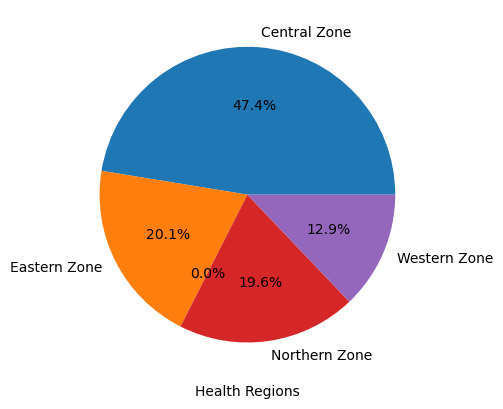

In [25]:
dfCount["Rehabilitation"].plot.pie(autopct="%.1f%%")
plt.xlabel("Health Regions")
plt.ylabel("")
plt.show()

The central zone concentrates most of the rehabilitation hospitals. One health centre (IWK) focuses on other specialties and does not have any beds of that type (you can see more, e.g., if you search on it online).

### Question 4

Resources for Mental Health have become increasingly important in recent years, specially given the new stressors incurred by the pandemic. 

However, it was stated that the percentage of beds relative to the population was unequal across provinces. Use the data to provide further evidence or to refute this statement. 

Why is that the case? In your view, how should these percentages be determined? [2.5 pts]

We first need the population of each province. We can search that easily in different (online) resources and build a corresponding dataframe. We can either write a CSV file and load it in a dataframe, or add the data directly. I loaded the 2023 directly as a dataframe since there are not too many rows.

The data corresponds to the year 2023 and was collected from StatsCanada:

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901

In [26]:
data = {
    'Province': ['NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC'],
    'Population': [521542, 164318, 992055, 789225, 8808088, 14826276, 1390089, 1177884, 4570303, 5292109]
}
dfPopulation = pd.DataFrame(data)
dfPopulation

,Province,Population
0,NL,521542
1,PE,164318
2,NS,992055
3,NB,789225
4,QC,8808088
5,ON,14826276
6,MB,1390089
7,SK,1177884
8,AB,4570303
9,BC,5292109


Now we organize the total number of mental health beds per province in a similar dataframe. First, we need to clean the column name

In [27]:
dfHospital.columns

Index(['Province', 'Health region', 'Hospital name', 'Type of hospital',
       'Teaching status', 'Intensive Care', 'Obstetrics', 'Pediatrics',
       'Mental Health and Addictions ', 'Rehabilitation', 'Long-Term Care',
       'Other Acute'],
      dtype='object')

In [46]:
dfHospital = dfHospital.rename(columns={"Mental Health and Addictions ": "Mental Health and Addictions" })
dfHospital.columns

Index(['Province', 'Health region', 'Hospital name', 'Type of hospital',
       'Teaching status', 'Intensive Care', 'Obstetrics', 'Pediatrics',
       'Mental Health and Addictions', 'Rehabilitation', 'Long-Term Care',
       'Other Acute'],
      dtype='object')

In [49]:
# Based on the problem description (see above), empty fields are zero 
dfHospital["Mental Health and Addictions"] = dfHospital["Mental Health and Addictions"].fillna(0)
dfHospital.head(3)

,Province,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
0,ON,Central East LHIN,Scarborough Health Network,G,Non-Teaching,62.0,50.0,26,92.0,20,33.0,482.0
1,ON,Central LHIN,Humber River Hospital,G,Non-Teaching,41.0,25.0,14,64.0,18,0.0,466.0
2,ON,Central LHIN,Mackenzie Health,G,Non-Teaching,30.0,14.0,6,25.0,23,74.0,259.0


We can now create the desired table by grouping:

In [43]:
dfProvince = dfHospital.groupby("Province").sum()
dfProvince.head(3)

,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
Province,,,,,,,,,,,
AB,Calgary ZoneCalgary ZoneCalgary ZoneCalgary Zo...,Alberta Children’s HospitalCanmore General Hos...,"S-PedG,EGG,EG,EGG,EG,EGGGG,EG,EEEEGGG,EEEGGGGG...",TeachingNon-TeachingNon-TeachingNon-TeachingNo...,400.0,402.0,921210108101110,1355.0,0455044453044124161963068252430,2039.0,5973.0
BC,Fraser HealthFraser HealthFraser HealthFraser ...,Abbotsford Regional Hospital and Cancer Centre...,"G,S-PsyG,E,S-PsyG,E,S-PsyE,RE,GE,G,RE,GE,G,S-P...",Non-TeachingNon-TeachingNon-TeachingNon-Teachi...,478.0,780.0,1291216210411983316683,1263.0,25207925203813322532202214626517,2887.0,6174.0
MB,Interlake–Eastern Regional Health AuthorityInt...,Arborg and Districts Health CentreBeausejour D...,"GGGGGGGGGGGGGG,EG,S-PsyG,S-PsyGGGG,E,S-Psy,RGG...",Non-TeachingNon-TeachingNon-TeachingNon-Teachi...,165.0,181.0,87,335.0,491316202514881431707630,233.0,2834.0


Finally, we merge the dataframes based on our previous assignment:

In [50]:
dfProvincePopulation = pd.merge(dfProvince, dfPopulation, left_index=True, right_on="Province")
dfProvincePopulation.head(3)

,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute,Province,Population
8,Calgary ZoneCalgary ZoneCalgary ZoneCalgary Zo...,Alberta Children’s HospitalCanmore General Hos...,"S-PedG,EGG,EG,EGG,EG,EGGGG,EG,EEEEGGG,EEEGGGGG...",TeachingNon-TeachingNon-TeachingNon-TeachingNo...,400.0,402.0,921210108101110,1355.0,0455044453044124161963068252430,2039.0,5973.0,AB,4570303
9,Fraser HealthFraser HealthFraser HealthFraser ...,Abbotsford Regional Hospital and Cancer Centre...,"G,S-PsyG,E,S-PsyG,E,S-PsyE,RE,GE,G,RE,GE,G,S-P...",Non-TeachingNon-TeachingNon-TeachingNon-Teachi...,478.0,780.0,1291216210411983316683,1263.0,25207925203813322532202214626517,2887.0,6174.0,BC,5292109
6,Interlake–Eastern Regional Health AuthorityInt...,Arborg and Districts Health CentreBeausejour D...,"GGGGGGGGGGGGGG,EG,S-PsyG,S-PsyGGGG,E,S-Psy,RGG...",Non-TeachingNon-TeachingNon-TeachingNon-Teachi...,165.0,181.0,87,335.0,491316202514881431707630,233.0,2834.0,MB,1390089


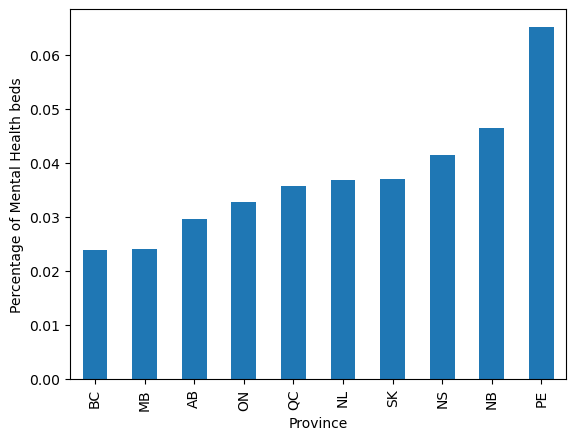

In [52]:
dfProvincePopulation["PercentageMHA"] = 100 * dfProvincePopulation["Mental Health and Addictions"]/dfProvincePopulation["Population"]

# Note: there are different ways of obtaining this plot, this is an easy one
dfSorted = dfProvincePopulation.sort_values("PercentageMHA")
dfSorted.plot.bar(x="Province", y="PercentageMHA", legend=False)
plt.ylabel("Percentage of Mental Health beds")
plt.show()

Indeed, the percentage of beds could be read as unbalanced, since some percentages are much higher than others. We would need to collect more data to assess if patients in regions where the percentage is small are suffering from a lack of beds, i.e., by checking the incidence of Mental Health and Addiction conditions in the area. The percentage of beds should be ideally enough to cover demand in each region according to their needs.

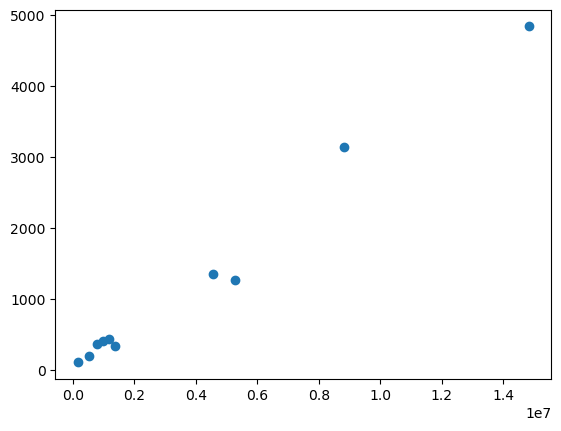

In [78]:
plt.scatter(dfProvincePopulation["Population"], dfProvincePopulation["Mental Health and Addictions"]) 

In [82]:
dfProvinceGroup = dfHospital.groupby("Province").count()
dfProvinceGroup.head(10)

,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
Province,,,,,,,,,,,
AB,108,108,108,108,108,16,8,108,20,61,97
BC,99,99,99,99,99,33,16,99,16,23,79
MB,72,72,72,72,72,8,2,72,12,5,70
NB,25,25,25,25,25,9,7,25,6,11,21
NL,34,34,34,34,34,9,1,34,3,21,26
NS,37,37,37,37,37,9,2,37,10,9,32
NT,4,4,4,4,4,0,1,4,0,0,1
ON,142,142,142,142,142,72,41,142,59,87,125
PE,7,7,7,7,7,2,2,7,1,0,6


In [83]:
dfProvinceCount = pd.merge(dfProvinceGroup, dfPopulation, left_index=True, right_on="Province")
dfProvinceCount.head(10)

,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute,Province,Population
8,108,108,108,108,108,16,8,108,20,61,97,AB,4570303
9,99,99,99,99,99,33,16,99,16,23,79,BC,5292109
6,72,72,72,72,72,8,2,72,12,5,70,MB,1390089
3,25,25,25,25,25,9,7,25,6,11,21,NB,789225
0,34,34,34,34,34,9,1,34,3,21,26,NL,521542
2,37,37,37,37,37,9,2,37,10,9,32,NS,992055
5,142,142,142,142,142,72,41,142,59,87,125,ON,14826276
1,7,7,7,7,7,2,2,7,1,0,6,PE,164318
4,35,35,0,0,35,26,19,35,10,0,32,QC,8808088
7,62,62,62,62,62,8,6,62,2,2,58,SK,1177884


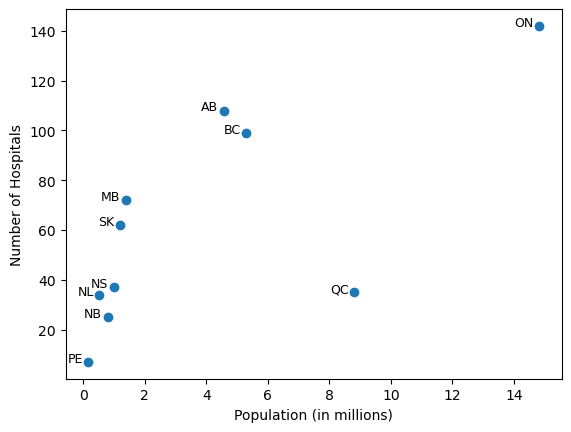

In [107]:
dfProvinceCount["ScaledPop"] = dfProvinceCount["Population"]/1000000
plt.scatter(dfProvinceCount["ScaledPop"], dfProvinceCount["Health region"])

for i, row in dfProvinceCount.iterrows():
    plt.text(row["ScaledPop"]-0.18, row["Health region"], row["Province"], fontsize=9, ha='right')

plt.xlabel("Population (in millions)")
plt.ylabel("Number of Hospitals")
plt.show()

### Question 5

The pervasive strategy used by hospitals now is to transfer beds from other specialties to ICU units, effectively turning them into Intensive Care beds. However, it is not clear if this will significantly improve the situation at hospitals.

Show the <b>percentage change</b> in ICU beds in each province if this policy were to be fully implemented, i.e., if all other specialty beds were to be transformed to ICU beds. Use one or more plots to better depict how significant (or not) these changes are. 

Is this policy realistic? 

Even if it is not, what insights can you draw from this analysis?  [2.5 pts]

We first clean the data types and fill the NAs with empty fields.

In [32]:
dfHospital.dtypes

Province                         object
Health region                    object
Hospital name                    object
Type of hospital                 object
Teaching status                  object
Intensive Care                  float64
Obstetrics                      float64
Pediatrics                       object
Mental Health and Addictions    float64
Rehabilitation                   object
Long-Term Care                  float64
Other Acute                     float64
dtype: object

In [33]:
# Let's check what happened to Pediatrics and Rehabilitation
dfHospital[ ~(dfHospital["Rehabilitation"].apply(is_number)) ]

,Province,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
345,NS,Central Zone,Eastern Shore Memorial Hospital,G,Non-Teaching,0.0,NaN,NaN,0.0,zero,NaN,5.0
346,NS,Central Zone,Hants Community Hospital,"G,E",Non-Teaching,0.0,NaN,NaN,0.0,zero,32.0,38.0
509,ON,Toronto Central LHIN,The Salvation Army Toronto Grace Health Centre,"E,G",Non-Teaching,0.0,NaN,NaN,0.0,error,100.0,19.0


In [34]:
dfHospital[ ~(dfHospital["Pediatrics"].apply(is_number)) ]

,Province,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
370,NS,Northern Zone,Sutherland Harris Memorial Hospital,"E,R",Non-Teaching,0.0,NaN,zero,0.0,18,20.0,NaN
410,ON,Champlain LHIN,Royal Ottawa Health Care Group,S-Psy,Non-Teaching,0.0,NaN,error,260.0,NaN,NaN,NaN
573,SK,Heartland Health Region,Davidson Health Centre,G,Non-Teaching,0.0,NaN,zero,0.0,NaN,NaN,5.0


We cannot set "error" as NA and fill it with zero because we do not know the actual numbers. So we can simply remove it from the table since we only have two instances. The "zero" will be automatically set to NA after we apply the to_numeric function.

In [35]:
dfHospitalCleaned = dfHospital[ (dfHospital["Pediatrics"] != "error") ]
dfHospitalCleaned = dfHospitalCleaned[ (dfHospitalCleaned["Rehabilitation"] != "error") ]

Let's check the field again

In [36]:
dfHospitalCleaned[ ~(dfHospitalCleaned["Pediatrics"].apply(is_number)) ]

,Province,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
370,NS,Northern Zone,Sutherland Harris Memorial Hospital,"E,R",Non-Teaching,0.0,NaN,zero,0.0,18,20.0,NaN
573,SK,Heartland Health Region,Davidson Health Centre,G,Non-Teaching,0.0,NaN,zero,0.0,NaN,NaN,5.0


In [37]:
dfHospitalCleaned[ ~(dfHospitalCleaned["Rehabilitation"].apply(is_number)) ]

,Province,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute
345,NS,Central Zone,Eastern Shore Memorial Hospital,G,Non-Teaching,0.0,NaN,NaN,0.0,zero,NaN,5.0
346,NS,Central Zone,Hants Community Hospital,"G,E",Non-Teaching,0.0,NaN,NaN,0.0,zero,32.0,38.0


In [38]:
# All good! Now let's address the string issue
dfHospitalCleaned["Pediatrics"] = pd.to_numeric(dfHospitalCleaned["Pediatrics"], errors="coerce")
dfHospitalCleaned["Rehabilitation"] = pd.to_numeric(dfHospitalCleaned["Rehabilitation"], errors="coerce")

dfHospitalCleaned.isnull().sum()

Province                          0
Health region                     0
Hospital name                     0
Type of hospital                 35
Teaching status                  35
Intensive Care                    0
Obstetrics                      434
Pediatrics                      524
Mental Health and Addictions      0
Rehabilitation                  490
Long-Term Care                  408
Other Acute                      77
dtype: int64

In [39]:
# Let's fill the NA with zeroes
dfHospitalCleaned = dfHospitalCleaned.fillna(
    {"Obstetrics":0, "Pediatrics":0, "Rehabilitation":0, "Long-Term Care":0, "Other Acute":0}
)
dfHospitalCleaned.isnull().sum()

Province                         0
Health region                    0
Hospital name                    0
Type of hospital                35
Teaching status                 35
Intensive Care                   0
Obstetrics                       0
Pediatrics                       0
Mental Health and Addictions     0
Rehabilitation                   0
Long-Term Care                   0
Other Acute                      0
dtype: int64

In [40]:
# Let us now calculate what would happen in this new policy

# Calculate new number of ICU beds
dfHospitalCleaned["New ICU"] = dfHospitalCleaned["Intensive Care"] + dfHospitalCleaned["Obstetrics"] + dfHospitalCleaned["Pediatrics"] + dfHospitalCleaned["Mental Health and Addictions"] + dfHospitalCleaned["Rehabilitation"] + dfHospitalCleaned["Long-Term Care"] + dfHospitalCleaned["Other Acute"]
dfHospitalCleaned.head(10)

,Province,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute,New ICU
0,ON,Central East LHIN,Scarborough Health Network,G,Non-Teaching,62.0,50.0,26.0,92.0,20.0,33.0,482.0,765.0
1,ON,Central LHIN,Humber River Hospital,G,Non-Teaching,41.0,25.0,14.0,64.0,18.0,0.0,466.0,628.0
2,ON,Central LHIN,Mackenzie Health,G,Non-Teaching,30.0,14.0,6.0,25.0,23.0,74.0,259.0,431.0
3,ON,Central LHIN,Markham Stouffville Hospital,G,Non-Teaching,10.0,29.0,5.0,33.0,31.0,10.0,188.0,306.0
4,ON,Central LHIN,North York General Hospital,G,Non-Teaching,21.0,28.0,12.0,50.0,0.0,0.0,320.0,431.0
5,AB,Calgary Zone,Alberta Children’s Hospital,S-Ped,Teaching,15.0,0.0,92.0,12.0,0.0,0.0,8.0,127.0
6,AB,Calgary Zone,Canmore General Hospital,"G,E",Non-Teaching,0.0,0.0,0.0,0.0,0.0,23.0,21.0,44.0
7,AB,Calgary Zone,Claresholm General Hospital,G,Non-Teaching,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0
8,AB,Calgary Zone,Covenant Health Mineral Springs Hospital,"G,E",Non-Teaching,0.0,0.0,0.0,0.0,0.0,25.0,22.0,47.0
9,AB,Calgary Zone,Didsbury District Health Services,"G,E",Non-Teaching,0.0,0.0,0.0,0.0,0.0,21.0,16.0,37.0


In [41]:
# Group by province
dfProvince = dfHospitalCleaned.groupby("Province").sum()
dfProvince

,Health region,Hospital name,Type of hospital,Teaching status,Intensive Care,Obstetrics,Pediatrics,Mental Health and Addictions,Rehabilitation,Long-Term Care,Other Acute,New ICU
Province,,,,,,,,,,,,
AB,Calgary ZoneCalgary ZoneCalgary ZoneCalgary Zo...,Alberta Children’s HospitalCanmore General Hos...,"S-PedG,EGG,EG,EGG,EG,EGGGG,EG,EEEEGGG,EEEGGGGG...",TeachingNon-TeachingNon-TeachingNon-TeachingNo...,400.0,402.0,163.0,1355.0,501.0,2039.0,5973.0,10833.0
BC,Fraser HealthFraser HealthFraser HealthFraser ...,Abbotsford Regional Hospital and Cancer Centre...,"G,S-PsyG,E,S-PsyG,E,S-PsyE,RE,GE,G,RE,GE,G,S-P...",Non-TeachingNon-TeachingNon-TeachingNon-Teachi...,478.0,780.0,132.0,1263.0,509.0,2887.0,6174.0,12223.0
MB,Interlake–Eastern Regional Health AuthorityInt...,Arborg and Districts Health CentreBeausejour D...,"GGGGGGGGGGGGGG,EG,S-PsyG,S-PsyGGGG,E,S-Psy,RGG...",Non-TeachingNon-TeachingNon-TeachingNon-Teachi...,165.0,181.0,15.0,335.0,446.0,233.0,2834.0,4209.0
NB,Zone 1 (Moncton Area)Zone 1 (Moncton Area)Zone...,Dr. Georges-L.-Dumont University Hospital Cent...,"G,R,EGGG,E,RS-PsyGGG,REGG,RGGRGG,EGGG,ES-PsyG,...",Non-TeachingNon-TeachingNon-TeachingNon-Teachi...,144.0,164.0,81.0,367.0,116.0,500.0,1446.0,2818.0
NL,Central HealthCentral HealthCentral HealthCent...,A. M. Guy Memorial Health CentreBaie Verte Pen...,"E,GE,GG,S-Psy,S-PedE,GEE,GE,GE,GGE,GE,GGGGG,E,...",Non-TeachingNon-TeachingNon-TeachingNon-Teachi...,96.0,115.0,15.0,192.0,75.0,791.0,1089.0,2373.0
NS,Central ZoneCentral ZoneCentral ZoneCentral Zo...,Dartmouth General HospitalEast Coast Forensic ...,"GS-PsyGG,EGS-PsyG,E,R,S-PsyGGG,S-Psy,E,S-PedGG...",Non-TeachingNon-TeachingNon-TeachingNon-Teachi...,128.0,145.0,8.0,412.0,194.0,333.0,1895.0,3115.0
NT,Beaufort-Delta Health and Social Services Auth...,Inuvik Regional HospitalFort Smith Health Cent...,"E,G,S-PedG,EG,ES-Oth,E,S-Ped,S-Psy",TeachingNon-TeachingNon-TeachingTeaching,4.0,0.0,10.0,10.0,0.0,0.0,30.0,54.0
ON,Central East LHINCentral LHINCentral LHINCentr...,Scarborough Health NetworkHumber River Hospita...,"GGGGGGGGGS-PsyGGS-OthGGGGGGE,R,GGS-PedGGGGGGGG...",Non-TeachingNon-TeachingNon-TeachingNon-Teachi...,1751.0,1313.0,502.0,4584.0,2676.0,4868.0,16210.0,31904.0
PE,Health PEIHealth PEIHealth PEIHealth PEIHealth...,Hillsborough HospitalKings County Memorial Hos...,"S-PsyGG,EG,C,R,S-PsyG,C,RGG",Non-TeachingNon-TeachingNon-TeachingNon-Teachi...,24.0,24.0,19.0,107.0,20.0,0.0,295.0,489.0


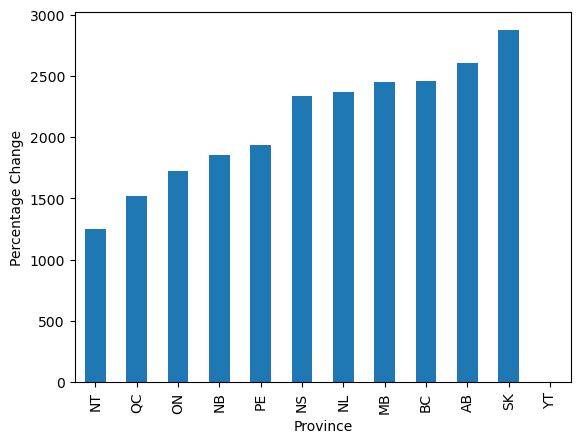

In [42]:
# Calculate percentage change
dfProvince["Change"] = 100*(dfProvince["New ICU"] - dfProvince["Intensive Care"])/dfProvince["Intensive Care"]

# Plot percentage change
dfProvince["Change"].sort_values().plot.bar()
plt.ylabel("Percentage Change")
plt.show()

The changes would be significant, with some provices (such as NL) increasing the number of beds by more than 2,000\%. However, this policy is not feasible in normal circumstances because several emergency procedures (such as surgeries) that cannot be delayed would still require beds. It is useful to provide us an estimate of the maximum number of extra beds we can add to provinces if needed.